Example showing how to use LORA models from Hugging Face

In [1]:
import torch
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler
import gc

In [2]:
model_path = "sayakpaul/sd-model-finetuned-lora-t4"
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16).to("cuda")
pipe.unet.load_attn_procs(model_path)
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)
def disabled_safety_checker(images, clip_input):
    if len(images.shape)==4:
        num_images = images.shape[0]
        return images, [False]*num_images
    else:
        return images, False
pipe.safety_checker = disabled_safety_checker

pipe.scheduler

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


EulerAncestralDiscreteScheduler {
  "_class_name": "EulerAncestralDiscreteScheduler",
  "_diffusers_version": "0.19.3",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "set_alpha_to_one": false,
  "skip_prk_steps": true,
  "steps_offset": 1,
  "timestep_spacing": "linspace",
  "trained_betas": null
}

  0%|          | 0/30 [00:00<?, ?it/s]

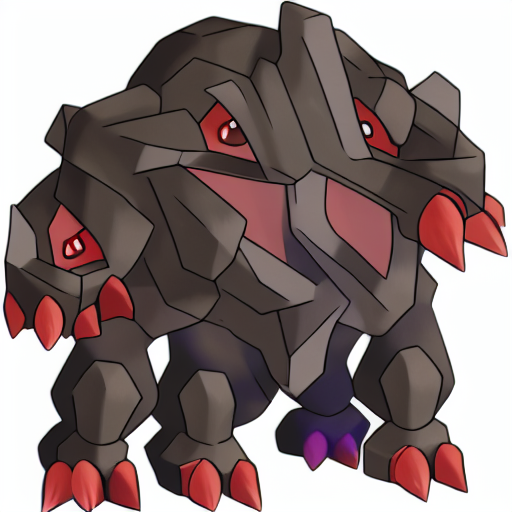

In [12]:
prompt = "A pokemon with (blue eyesballs:1.9)"
neg_prompt = "low quality, watermark, blue body, blue jaws"
image = pipe(prompt, negative_prompt=neg_prompt, width=512, height=512, num_inference_steps=30).images[0]
image

In [14]:
from random import SystemRandom
randr = SystemRandom()
#randr.randrange(0xFFFFFFFFFFFFFFFF)

import requests
from PIL import Image
from io import BytesIO
from math import ceil

def flex_grid(imgs, cols):
  rows=ceil(len(imgs)/cols)

  w, h = imgs[0].size
  grid = Image.new('RGB', size=(cols*w, rows*h))

  for i, img in enumerate(imgs):
      grid.paste(img, box=(i%cols*w, i//cols*h))
  return grid

Generating 1 of 6 with seed = 13917040293122347357


  0%|          | 0/30 [00:00<?, ?it/s]

Generating 2 of 6 with seed = 5596612288767038365


  0%|          | 0/30 [00:00<?, ?it/s]

Generating 3 of 6 with seed = 3094873760267712636


  0%|          | 0/30 [00:00<?, ?it/s]

Generating 4 of 6 with seed = 11353349484412553741


  0%|          | 0/30 [00:00<?, ?it/s]

Generating 5 of 6 with seed = 2684011896734316865


  0%|          | 0/30 [00:00<?, ?it/s]

Generating 6 of 6 with seed = 18350817849730559855


  0%|          | 0/30 [00:00<?, ?it/s]

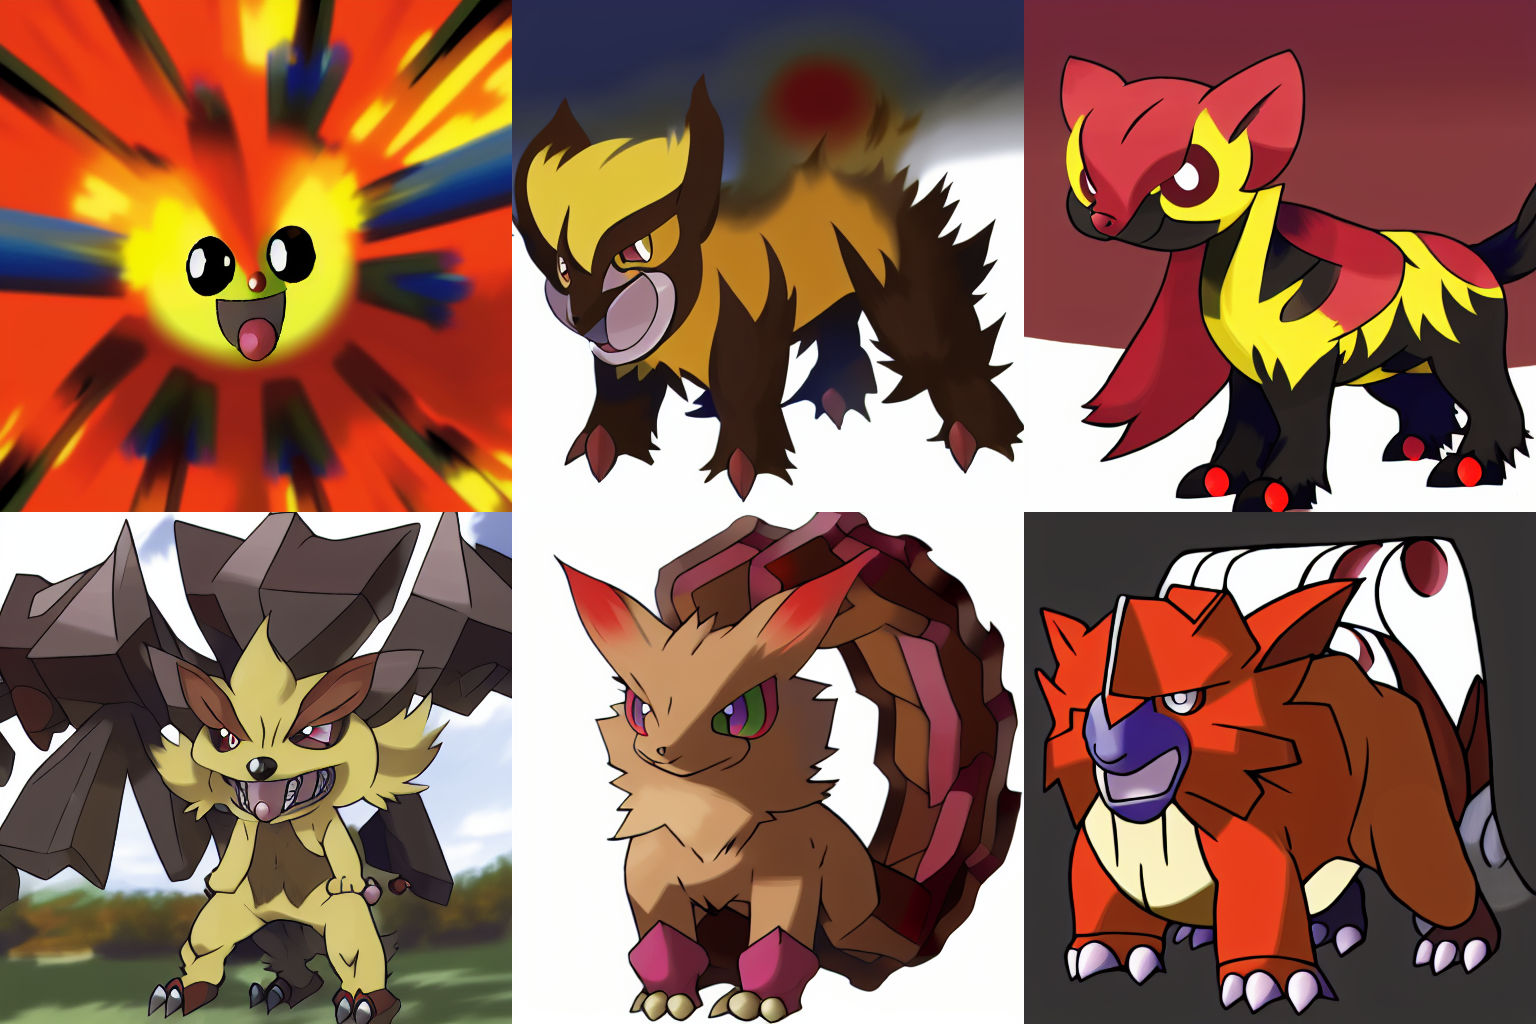

In [15]:
num_cols = 3
num_images = 6

images = []
for i in range(num_images):
  seed = randr.randrange(0xFFFFFFFFFFFFFFFF)
  print(f'Generating {i + 1} of {num_images} with seed = {seed}')
  generator = torch.Generator("cuda").manual_seed(seed)
  images.extend(pipe(prompt, negative_prompt=neg_prompt, num_inference_steps=30, generator=generator).images)
grid = flex_grid(images, cols=num_cols)
grid

In [18]:
if 'grid' in globals():
    del grid
if 'images' in globals():
    del images
if 'image' in globals():
    del image
if 'pipe' in globals():
    del pipe
gc.collect()
torch.cuda.empty_cache()
print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |   8320 KiB |   3256 MiB |   8374 GiB |   8374 GiB |
|       from large pool |   8320 KiB |   3181 MiB |   8211 GiB |   8211 GiB |
|       from small pool |      0 KiB |     81 MiB |    162 GiB |    162 GiB |
|---------------------------------------------------------------------------|
| Active memory         |   8320 KiB |   3256 MiB |   8374 GiB |   8374 GiB |
|       from large pool |   8320 KiB |   3181 MiB |   8211 GiB |

In [19]:
print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |   8320 KiB |   3256 MiB |   8374 GiB |   8374 GiB |
|       from large pool |   8320 KiB |   3181 MiB |   8211 GiB |   8211 GiB |
|       from small pool |      0 KiB |     81 MiB |    162 GiB |    162 GiB |
|---------------------------------------------------------------------------|
| Active memory         |   8320 KiB |   3256 MiB |   8374 GiB |   8374 GiB |
|       from large pool |   8320 KiB |   3181 MiB |   8211 GiB |